In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 폰트 지정하기
plt.rcParams['font.family'] = 'gulim'

In [2]:
train_df = pd.read_csv('./train.csv')
building_info = pd.read_csv('./building_info.csv')
test_df = pd.read_csv('./test.csv')

## 데이터 확인 및 전처리

In [3]:
train_df.head()

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40


In [4]:
test_df.head() # 일조(hr), 일사(MJ/m2) 컬럼이 train_df에만 존재하므로 제거

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%)
0,1_20220825 00,1,20220825 00,23.5,0.0,2.2,72
1,1_20220825 01,1,20220825 01,23.0,0.0,0.9,72
2,1_20220825 02,1,20220825 02,22.7,0.0,1.5,75
3,1_20220825 03,1,20220825 03,22.1,0.0,1.3,78
4,1_20220825 04,1,20220825 04,21.8,0.0,1.0,77


In [5]:
building_info.head()

,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1,건물기타,110634.00,39570.00,-,-,-
1,2,건물기타,122233.47,99000.00,-,-,-
2,3,건물기타,171243.00,113950.00,40,-,-
3,4,건물기타,74312.98,34419.62,60,-,-
4,5,건물기타,205884.00,150000.00,-,2557,1000


In [6]:
train_df.info() # 강수량(mm), 풍속(m/s), 습도(%)에서 null값이 존재 => 결측값 처리에 대한 방법 고안 필요

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num_date_time  204000 non-null  object 
 1   건물번호           204000 non-null  int64  
 2   일시             204000 non-null  object 
 3   기온(C)          204000 non-null  float64
 4   강수량(mm)        43931 non-null   float64
 5   풍속(m/s)        203981 non-null  float64
 6   습도(%)          203991 non-null  float64
 7   일조(hr)         128818 non-null  float64
 8   일사(MJ/m2)      116087 non-null  float64
 9   전력소비량(kWh)     204000 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 15.6+ MB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16800 entries, 0 to 16799
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num_date_time  16800 non-null  object 
 1   건물번호           16800 non-null  int64  
 2   일시             16800 non-null  object 
 3   기온(C)          16800 non-null  float64
 4   강수량(mm)        16800 non-null  float64
 5   풍속(m/s)        16800 non-null  float64
 6   습도(%)          16800 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 918.9+ KB


In [8]:
building_info.info() # 태양광용량(kW), ESS저장용량(kWh), PCS용량(kW)에서 '-'로 처리된 결측값이 존재 => 처리 후 float로 dtype변경 또는 컬럼 제거 필요.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   건물번호          100 non-null    int64  
 1   건물유형          100 non-null    object 
 2   연면적(m2)       100 non-null    float64
 3   냉방면적(m2)      100 non-null    float64
 4   태양광용량(kW)     100 non-null    object 
 5   ESS저장용량(kWh)  100 non-null    object 
 6   PCS용량(kW)     100 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ KB


In [9]:
# 임의로 '-'값들을 0으로 변환 후 float로 변경
building_info['태양광용량(kW)'] = building_info['태양광용량(kW)'].replace('-', 0).astype('float')
building_info['ESS저장용량(kWh)'] = building_info['ESS저장용량(kWh)'].replace('-', 0).astype('float')
building_info['PCS용량(kW)'] = building_info['PCS용량(kW)'].replace('-', 0).astype('float')

In [10]:
train_df = pd.merge(train_df, building_info, on='건물번호', how='left')
test_df = pd.merge(test_df, building_info, on='건물번호', how='left')

In [11]:
train_df.isna().sum()

num_date_time         0
건물번호                  0
일시                    0
기온(C)                 0
강수량(mm)          160069
풍속(m/s)              19
습도(%)                 9
일조(hr)            75182
일사(MJ/m2)         87913
전력소비량(kWh)            0
건물유형                  0
연면적(m2)               0
냉방면적(m2)              0
태양광용량(kW)             0
ESS저장용량(kWh)          0
PCS용량(kW)             0
dtype: int64

In [12]:
test_df.isna().sum()

num_date_time    0
건물번호             0
일시               0
기온(C)            0
강수량(mm)          0
풍속(m/s)          0
습도(%)            0
건물유형             0
연면적(m2)          0
냉방면적(m2)         0
태양광용량(kW)        0
ESS저장용량(kWh)     0
PCS용량(kW)        0
dtype: int64

In [13]:
# '일시'를 연도, 월, 일, 시간으로 분리
train_df['일시'] = pd.to_datetime(train_df['일시'], format='%Y%m%d %H')
train_df['hour'] = train_df['일시'].dt.hour
train_df['day'] = train_df['일시'].dt.day
train_df['month'] = train_df['일시'].dt.month
train_df['year'] = train_df['일시'].dt.year

test_df['일시'] = pd.to_datetime(test_df['일시'], format='%Y%m%d %H')
test_df['hour'] = test_df['일시'].dt.hour
test_df['day'] = test_df['일시'].dt.day
test_df['month'] = test_df['일시'].dt.month
test_df['year'] = test_df['일시'].dt.year

In [14]:
# 불필요한 컬럼 삭제
train_df.drop(['num_date_time', '건물번호', '일조(hr)', '일사(MJ/m2)'], axis = 1, inplace=True)
test_df.drop(['num_date_time', '건물번호'], axis = 1, inplace=True)

In [15]:
train_df.head()

,일시,기온(C),강수량(mm),풍속(m/s),습도(%),전력소비량(kWh),건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW),hour,day,month,year
0,2022-06-01 00:00:00,18.6,NaN,0.9,42.0,1085.28,건물기타,110634.0,39570.0,0.0,0.0,0.0,0,1,6,2022
1,2022-06-01 01:00:00,18.0,NaN,1.1,45.0,1047.36,건물기타,110634.0,39570.0,0.0,0.0,0.0,1,1,6,2022
2,2022-06-01 02:00:00,17.7,NaN,1.5,45.0,974.88,건물기타,110634.0,39570.0,0.0,0.0,0.0,2,1,6,2022
3,2022-06-01 03:00:00,16.7,NaN,1.4,48.0,953.76,건물기타,110634.0,39570.0,0.0,0.0,0.0,3,1,6,2022
4,2022-06-01 04:00:00,18.4,NaN,2.8,43.0,986.40,건물기타,110634.0,39570.0,0.0,0.0,0.0,4,1,6,2022


## 데이터 시각화

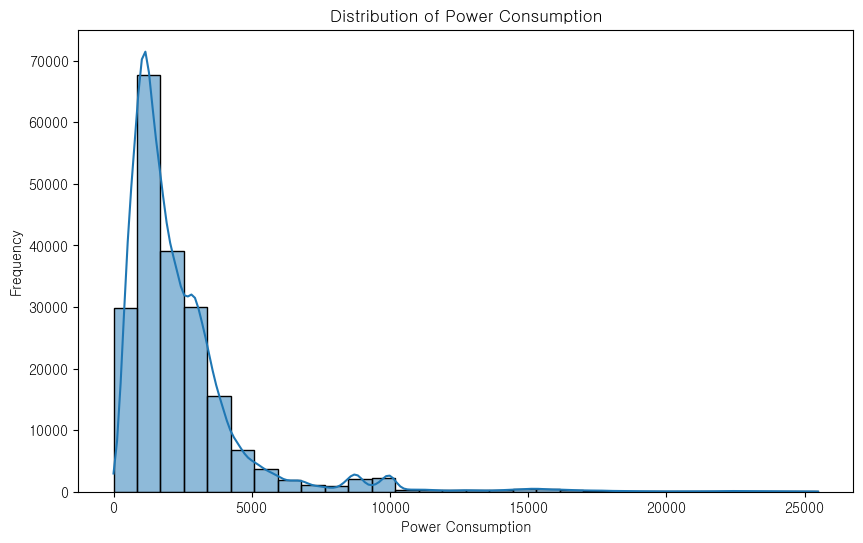

In [16]:
# 전력소비량 분포
plt.figure(figsize=(10, 6))
sns.histplot(train_df['전력소비량(kWh)'], bins=30, kde=True)
plt.title('Distribution of Power Consumption')
plt.xlabel('Power Consumption')
plt.ylabel('Frequency')
plt.show()

In [17]:
# 년기준 일 평균 소비전력
train_df['day_of_year'] = train_df['일시'].dt.dayofyear
mean_power_by_day_of_year = train_df.groupby('day_of_year')['전력소비량(kWh)'].mean()

# 년기준 시간평균 소비전력
train_df['hour_of_year'] = train_df['일시'].dt.hour + (train_df['일시'].dt.dayofyear - 1) * 24
mean_power_by_hour_of_year = train_df.groupby('hour_of_year')['전력소비량(kWh)'].mean()

# 년기준 월평균 소비전력
mean_power_by_month = train_df.groupby('month')['전력소비량(kWh)'].mean()

# 일기준 시간 평균 소비전력
mean_power_by_hour = train_df.groupby('hour')['전력소비량(kWh)'].mean()

# 월기준 시간 평균 소비전력
mean_power_by_day = train_df.groupby('day')['전력소비량(kWh)'].mean()

In [18]:
len(mean_power_by_day_of_year.index)

85

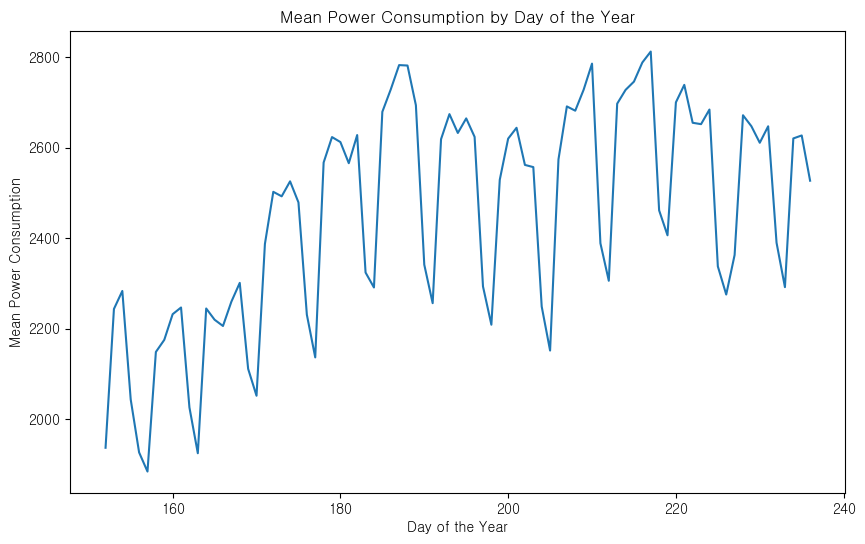

In [19]:
plt.figure(figsize=(10,6))
sns.lineplot(x=mean_power_by_day_of_year.index, y=mean_power_by_day_of_year.values)
plt.title('Mean Power Consumption by Day of the Year')
plt.xlabel('Day of the Year')
plt.ylabel('Mean Power Consumption')
plt.show()

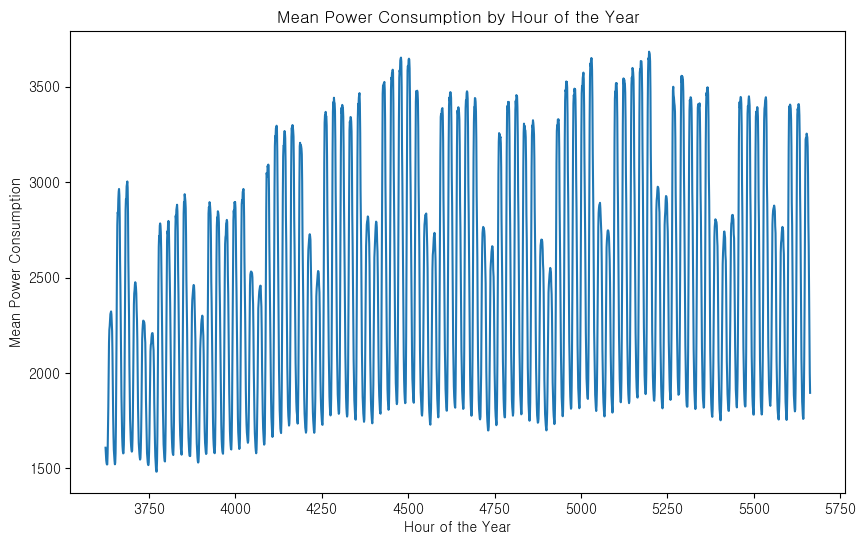

In [20]:
plt.figure(figsize=(10,6))
sns.lineplot(x=mean_power_by_hour_of_year.index, y=mean_power_by_hour_of_year.values)
plt.title('Mean Power Consumption by Hour of the Year')
plt.xlabel('Hour of the Year')
plt.ylabel('Mean Power Consumption')
plt.show()

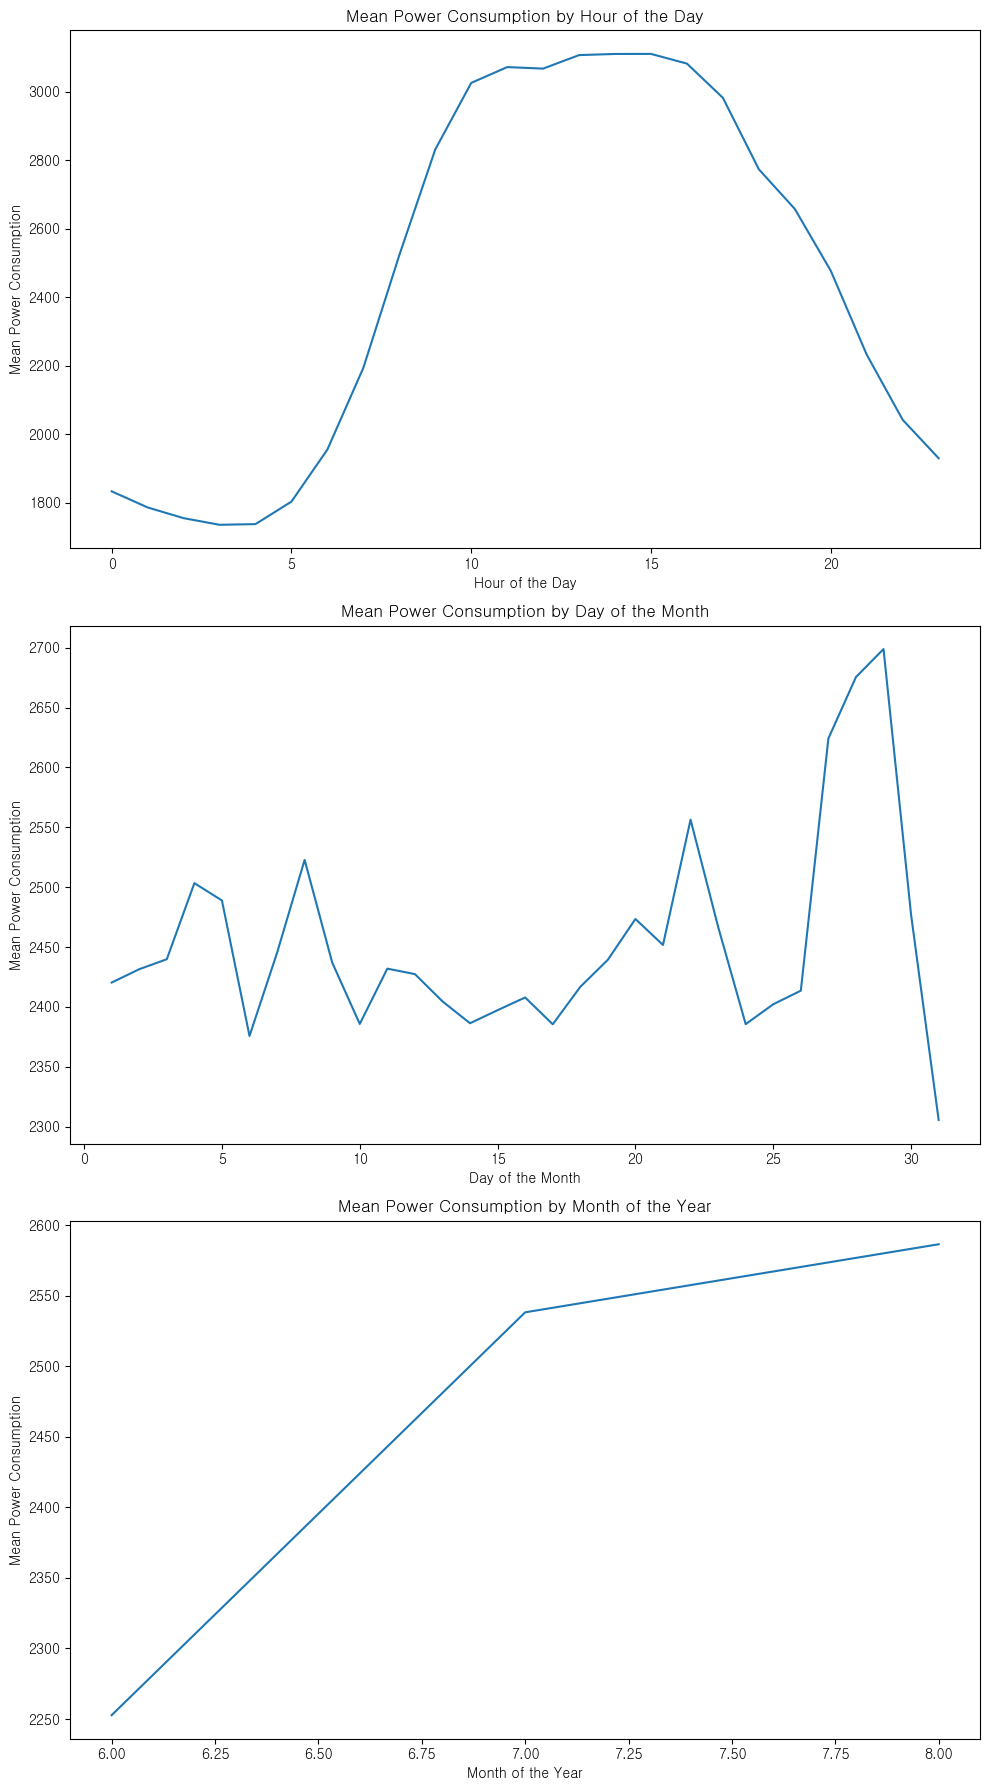

In [21]:
fig, axs = plt.subplots(3, 1, figsize=(10,18))

# Plot mean power consumption by hour of the day
sns.lineplot(x=mean_power_by_hour.index, y=mean_power_by_hour.values, ax=axs[0])
axs[0].set_title('Mean Power Consumption by Hour of the Day')
axs[0].set_xlabel('Hour of the Day')
axs[0].set_ylabel('Mean Power Consumption')

# Plot mean power consumption by day of the month
sns.lineplot(x=mean_power_by_day.index, y=mean_power_by_day.values, ax=axs[1])
axs[1].set_title('Mean Power Consumption by Day of the Month')
axs[1].set_xlabel('Day of the Month')
axs[1].set_ylabel('Mean Power Consumption')

# 년기준 월평균 소비전력
sns.lineplot(x=mean_power_by_month.index, y=mean_power_by_month.values, ax=axs[2])
axs[2].set_title('Mean Power Consumption by Month of the Year')
axs[2].set_xlabel('Month of the Year')
axs[2].set_ylabel('Mean Power Consumption')

plt.tight_layout()
plt.show()

# 낮 시간대에 전력소모량이 증가하고, 밤에는 다시 떨어지는 추세
# 여름으로 8월이 되어감에 따라 전력소모량 증가. 기온과 밀접한 관련으로 예상

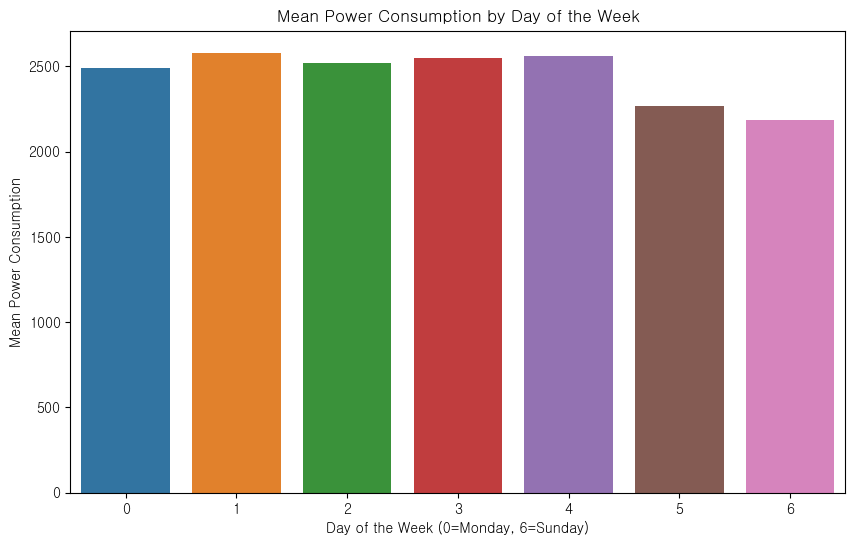

In [22]:
train_df['day_of_week'] = train_df['일시'].dt.dayofweek

# 요일별 전력평균
mean_power_by_day_of_week = train_df.groupby('day_of_week')['전력소비량(kWh)'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=mean_power_by_day_of_week.index, y=mean_power_by_day_of_week.values)
plt.title('Mean Power Consumption by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Mean Power Consumption')
plt.show()

# 주말엔 상대적으로 전력소모량이 줄어듬.

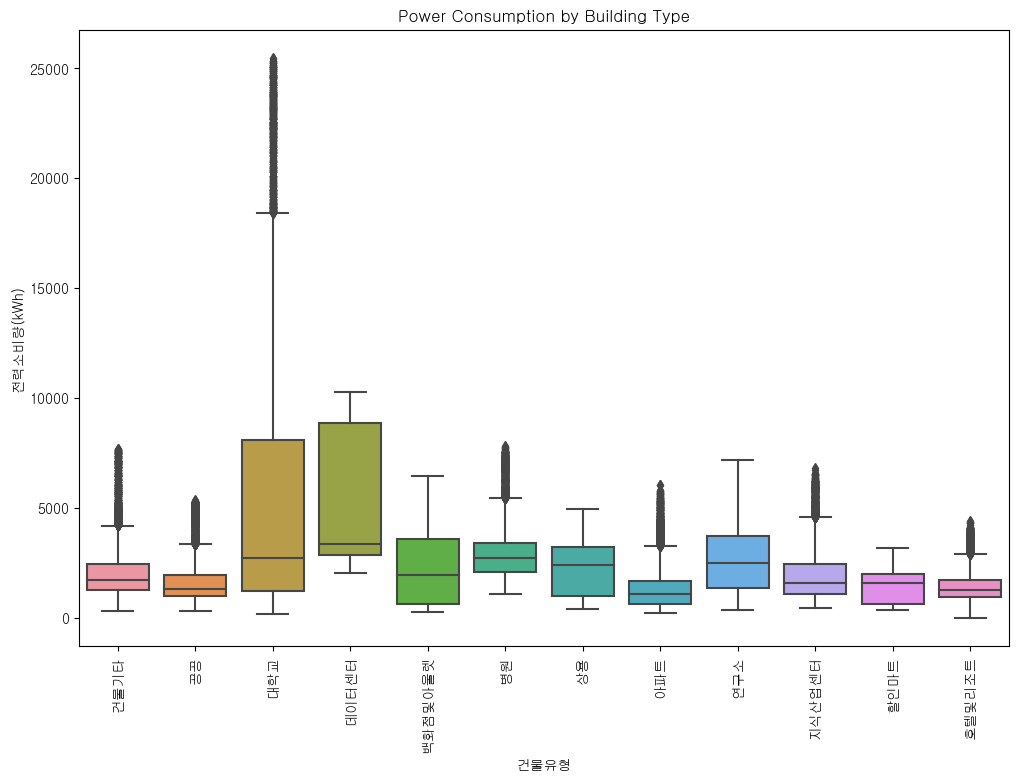

In [23]:
plt.figure(figsize=(12,8))
sns.boxplot(x='건물유형', y='전력소비량(kWh)', data=train_df)
plt.title('Power Consumption by Building Type')
plt.xticks(rotation=90)
plt.show()

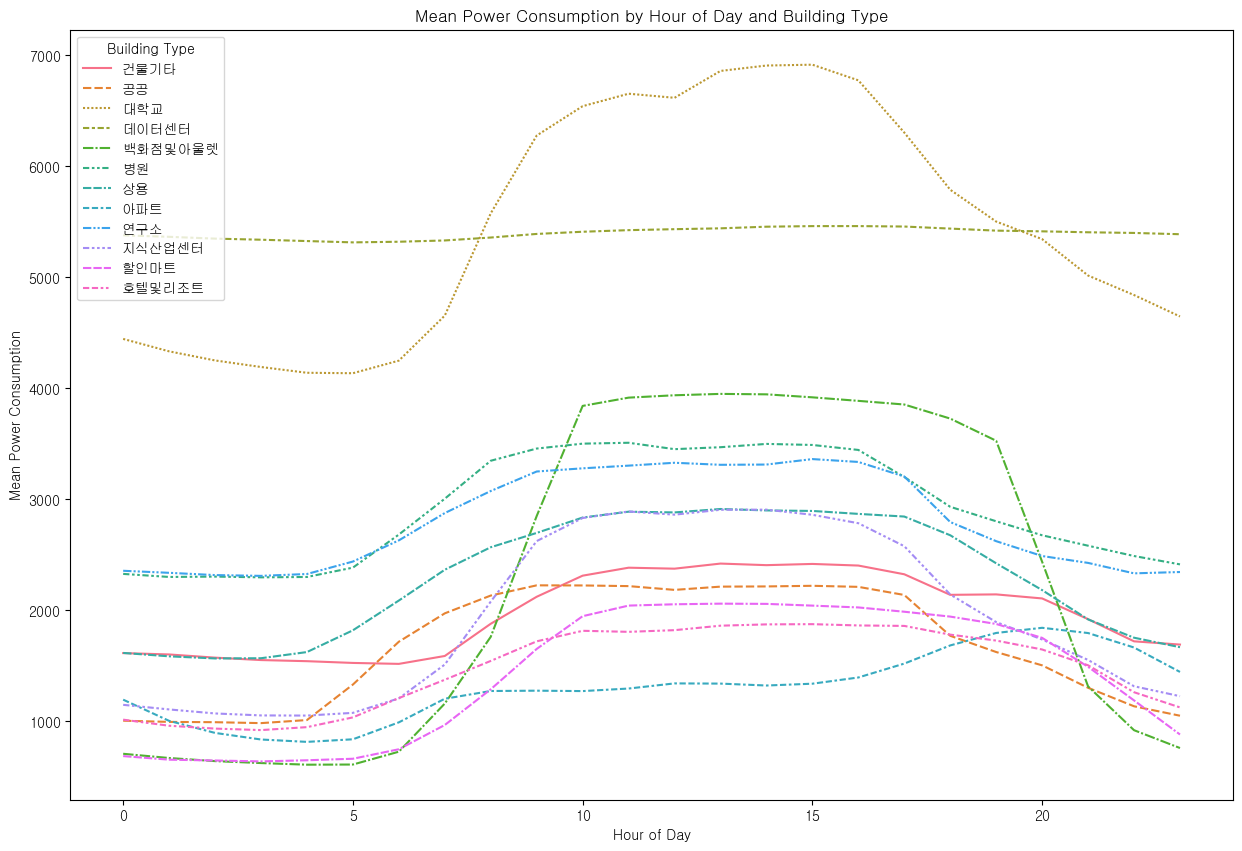

In [24]:
mean_power_by_hour_building = train_df.groupby(['hour', '건물유형'])['전력소비량(kWh)'].mean().reset_index()

pivot_df = mean_power_by_hour_building.pivot(index='hour', columns='건물유형', values='전력소비량(kWh)')

plt.figure(figsize=(15, 10))
sns.lineplot(data=pivot_df)
plt.title('Mean Power Consumption by Hour of Day and Building Type')
plt.xlabel('Hour of Day')
plt.ylabel('Mean Power Consumption')
plt.legend(title='Building Type')
plt.show()

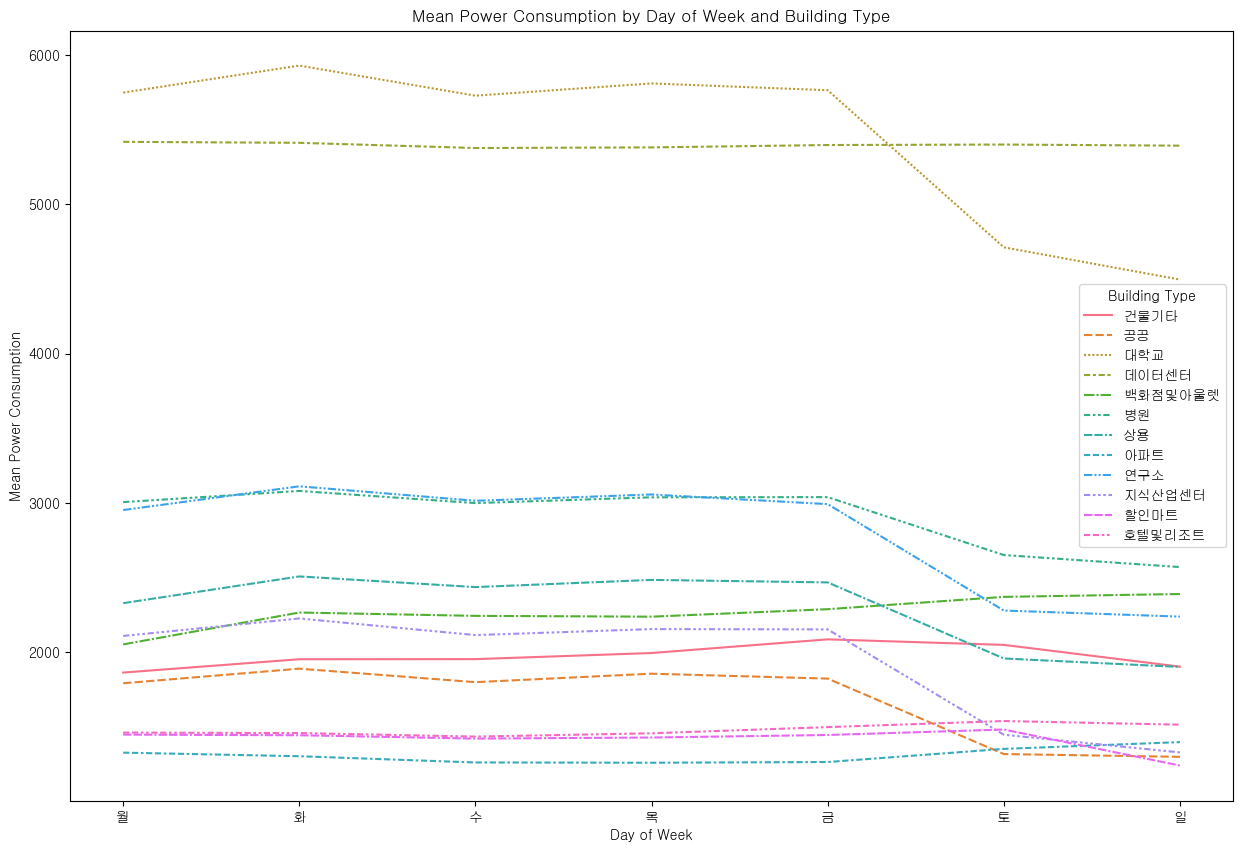

In [26]:
mean_power_by_day_building = train_df.groupby(['day_of_week', '건물유형'])['전력소비량(kWh)'].mean().reset_index()

pivot_df_day = mean_power_by_day_building.pivot(index='day_of_week', columns='건물유형', values='전력소비량(kWh)')

day_names = ['월', '화', '수', '목', '금', '토', '일']
pivot_df_day.index = day_names

plt.figure(figsize=(15,10))
sns.lineplot(data=pivot_df_day)
plt.title('Mean Power Consumption by Day of Week and Building Type')
plt.xlabel('Day of Week')
plt.ylabel('Mean Power Consumption')
plt.legend(title='Building Type')
plt.show()